<a href="https://colab.research.google.com/github/joaoassispadilha/topicosavancados/blob/master/Aula_02_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Seja bem vindo a nossa aula de Ciência de Dados.

Abaixo você pode ver que podemos escrever código Python e mesclar com informações textuais.


# Aula 1

In [5]:
print("João Assis")
print("Aula do dia 05-05-2020")

João Assis
Aula do dia 05-05-2020


Nesta aula vamos trabalhar com informações sobre filmes, e para isto vamos utilizar os dados vindos do site Movie Lens. (Mais especificamente https://grouplens.org/datasets/movielens/)

Abaixo um exemplo de variável em Python.

In [0]:
nome_do_filme = "A volta dos que não foram"

Na linha acima, criamos uma variável, e podemos utilizá-la abaixo.

In [7]:
print(nome_do_filme)

A volta dos que não foram


In [8]:
nome_do_filme

'A volta dos que não foram'

## Lendo os dados do MovieLens

Primeiramente, baixamos as informações do site (https://grouplens.org/datasets/movielens/) e em seguida adicionamos os arquivos no GitHub.

Com os dados salvos no GitHub, utilizamos a biblioteca Pandas para importá-los para nossa aplicação.

In [0]:
import pandas as pd

A função `read_csv` faz o processo de baixar o arquivo e importar os dados para um `DataFrame`.

In [10]:
filmes = pd.read_csv("https://github.com/joaoassispadilha/topicosavancados/raw/master/movies.csv")

# Ver o tipo de dado
type(filmes)

pandas.core.frame.DataFrame

Como estamos utilizando um dataset em inglês, podemos alterar os nomes das colunas do nosso dataset para português.

Também utilizamos a função `head` que serve para mostrar apenas os primeiros elementos do nosso dataset.

In [11]:
# Alterar nomes das colunas
filmes.columns = ["filmeId", "titulo", "generos"]
# Mostra os 5 primeiros itens
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


De forma similar ao `head`, a função `tail` mostra apenas os últimos elementos do nosso dataset. Note que podemos passar um número que indica a quantidade de elementos a serem mostrados.

In [12]:
# Mostra os 10 últimos itens
filmes.tail(10)

,filmeId,titulo,generos
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9734,193571,Silver Spoon (2014),Comedy|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9736,193579,Jon Stewart Has Left the Building (2015),Documentary
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


Utilizando o ponto de interrogação `?` na frente de uma variável ou função, podemos ler a documentação da mesma dentro da ferramenta Colab.

In [0]:
# lendo a documentação de um método/atributo
?filmes.head

In [0]:
# lendo a documentação do tipo
?filmes

## Lendo informações das avaliações

Após trabalharmos um pouco com os dados básicos dos filmes, chegou a hora de baixar as avaliações dados pelos usuários para cada filme.

Note que neste dataset, apenas informações numéricas estão presentes. Logo mais juntaremos os dois datasets (filmes e avaliações) em uma única variável.

In [15]:
avaliacoes = pd.read_csv("https://github.com/joaoassispadilha/topicosavancados/raw/master/ratings.csv")
avaliacoes

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Mas antes, vamos consultar algumas informações a respeito destes dados.

É possível verificar o formato do nosso dataset a partir do atributo `shape`, conforme abaixo.

In [16]:
# Os dados das avaliações estão organizados em 100836 linhas e 4 colunas
avaliacoes.shape

(100836, 4)

Você pode notar que o atributo `shape` retornou o número de linhas e o número de colunas do nosso dataset.

Podemos obter informação similar utilizando a nossa conhecida função `len`, que apresenta o total de linhas disponível neste dataset.

In [17]:
len(avaliacoes)

100836

Novamente vamos alterar os nomes das colunas (agora das avaliações) para português, para ficar mais fácil nossa interpretação.

In [18]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Já visualizamos várias informações do nosso dataset, não é?

Podemos aplicar um filtro neste dataset de avaliações, para visualizar as informações referentes a um único filme. Para isto, utilizamos a função `query`, passando como parâmetro a informação que queremos filtrar.

In [19]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId == 1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Podemos também obter várias informações estatísticas da nossa base dados através da função `describe`. Ela nos traz as informações de contagem, média, mediana, desvio padrão, valor mínimo e máximo, etc.

In [20]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Se quisermos, também é possível consultar apenas uma informação estatística por vez, conforme vemos a chamada da função `mean` abaixo, que traz a média das informações de um filme.

In [21]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Como vimos, a média de todas as informações de um filme não faz muito sentido. O que queremos mesmo é saber a média das notas de um determinado filme. Para isto, vamos fazer a média apenas da coluna de notas.

In [22]:
avaliacoes_do_filme_1["nota"].head()

0       4.0
516     4.0
874     4.5
1434    2.5
1667    4.5
Name: nota, dtype: float64

Aqui é onde se calcula a média das notas do filme 1.

In [23]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

Poderiamos também querer visualizar as médias das notas de todos os filmes do nosso dataset.

In [24]:
avaliacoes["nota"].mean()

3.501556983616962

Ou também, poderiamos querer visualizar as médias de cada filme separadamente. 

Ao invés de criar uma variável para cada filme, como fizemos acima, podemos utilizar a função `groupby`, que tem por objetivo agrupar informações iguais a partir de uma determinada coluna. Vejamos o exemplo abaixo.

In [25]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

## Juntar as informações de dois datasets

Também é possível juntar as informações de dois datasets.

Para isto, utilizamos a função `join`, passando qual informação queremos juntar, e qual é a coluna que deve ser utilizada como referência. Veja o exemplo abaixo.

In [26]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


As vezes é interessante ordenar as informações para uma melhor visualização. 

Para ordenar os dados, utilizamos a função `sort_values`, e passamos a coluna que queremos ordenar. O parâmetro `ascending` indica se é para ordenar de forma crescente ou decrescente.

In [27]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Melhorando a apresentação das informações utilizando gráficos

Já fizemos algumas avaliações interessantes, porém mostramos estas informações apenas em forma de texto.

Seria interessante aprendermos a plotar gráficos também.

A própria biblioteca `Pandas` possui diversmos mecanismos para apresentação de gráficos, de forma bem facilitada.

Vamos criar um gráfico bem simples como exemplo usando a função `plot`.

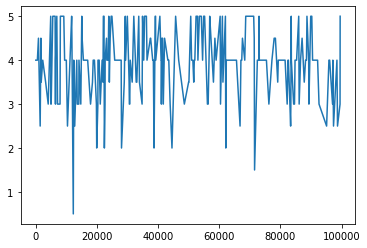

In [28]:
# Este gráfico não faz muito sentido com os nossos dados.
avaliacoes_do_filme_1["nota"].plot()

Vejam que interessante. Com uma linha de código fomos capazes de desenhar um gráfico a partir das informações do nosso dataset. Porém, o gráfico escolhido não parece ser o mais adequado, não é?

Vamos alterar o tipo de gráfico para visualizar melhor as informações. Para alterar o tipo de gráfico, podemos utilizar a opção `kind`, e passar o tipo do gráfico que queremos. Neste caso utilizamos o tipo de gráfico 'histograma'. Veja também que podemos utilizar a opção `title` para personalizar nosso gráfico.

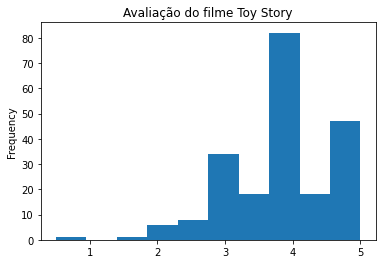

In [29]:
avaliacoes_do_filme_1["nota"].plot(kind='hist', title='Avaliação do filme Toy Story')

O Python possui bibliotecas muito ricas para manipulação de gráficos. Uma delas é a `matplotlib`. Podemos utilizá-la para personalizar um pouco mais nosso gráfico.

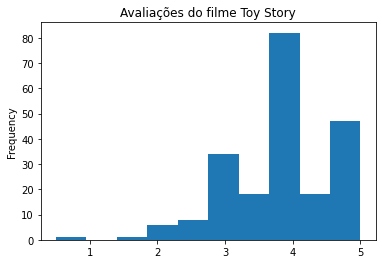

In [30]:
import matplotlib.pyplot as plt

avaliacoes_do_filme_1["nota"].plot(kind='hist')

plt.title("Avaliações do filme Toy Story")
plt.show()

Vamos plotar mais alguns gráficos agora para outros filmes. Vejam que estamos utilizando uma abordagem 'inline', onde aplicamos um filtro com a função `query`, pegamos apenas a coluna de "nota" e por fim plotamos um gráfico tipo 'histograma' utilizando a função `plot`.

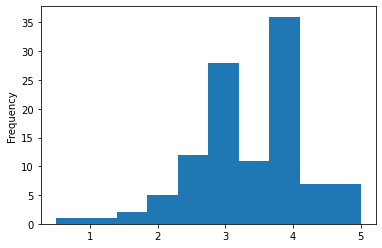

In [31]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')

Apenas mais um exemplo de gráfico de um filme com apenas uma nota. Este gráfico não parece muito interessante, não é?

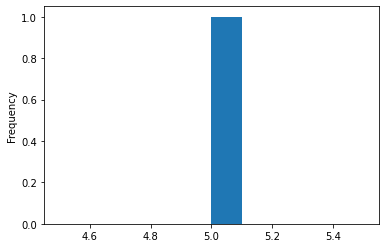

In [32]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist')

## Desafios

Chegou a hora de você praticar e aprender mais algumas coisas por conta própria. Para isto, temos que resolver os seguintes desafios.

**Desafio 1**
Existem 18 filmes sem avaliação. Determine se são mesmo 18 filmes, e qual o nome deles.

In [33]:
filmes_sem_nota = filmes_com_media.query("nota.isnull()", engine="python")
print("existem", len(filmes_sem_nota), "filmes sem nota. são eles: ")
filmes_sem_nota

existem 18 filmes sem nota. são eles: 


,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


**Desafio 2**
Alterar a coluna "nota" para "media".

In [34]:
filmes_com_media.columns = ["filmeId", "titulo", "generos", "media"]
filmes_com_media.head()



,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


**Desafio 3**
Colocar o número de avaliações por filme, não só a média, mas o TOTAL de votos por filme.

In [35]:
votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_votos = filmes_com_media.join(votos_por_filme, on = "filmeId")
filmes_com_votos.columns = ["filmeId", "titulo", "generos", "media", "votos"]
filmes_com_votos

,filmeId,titulo,generos,media,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


**Desafio 4**
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [36]:
filmes_com_votos.round({"media": 2})

,filmeId,titulo,generos,media,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Aula 2

Nesta aula vamos estudar com mais profundidade as técnicas de centralidade, conhecer algumas boas práticas de visualização de dados e o famoso **boxplot**.

Para iniciar vamos precisar relembrar como os dados estavam configurados.

Temos os títulos e uma coluna com os respectivos gêneros, todos em uma única coluna, cada *label* é separado com um | (Adventure|Children|Fantasy) sendo do tipo *String*.

In [37]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
filmes["generos"]

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

Gostariamos de fazer uma contagem a partir dos gêneros, para saber, por exemplo, a quantidade de gêneros, quantidade de filmes por gênero, etc.

Vamos aplicar a função `get_dummies` para nos ajudar no processo.

In [39]:
filmes["generos"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Com apenas uma linha de código, foi gerada essa tabela, com várias linhas, colunas e números.

Como pode ser visto, a saída é um `DataFrame`, cada coluna correspondendo a um determinado gênero. Os valores `1` indicam que o filme possui a categoria, e valores `0` indicam o contrário.

Até aqui, resolvemos parte do problema, agora precisamos somar quantos `1` cada coluna tem.

In [41]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Conseguimos verificar quantas vezes cada gênero aparece. Assim, fica fácil de responder perguntas como, qual o gênero com mais ou menos filmes produzidos? Qual o segundo? 

Se olharmos diretamente para esta tabela, não é tão fácil visualizar estas informações, pois elas não estão ordenadas. Vamos melhorar isso, ordenando estes dados.

In [42]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Para não precisar ficar repetindo toda vez este código todo, vamos atribuir estas informações em uma variável.

In [43]:
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
filmes_por_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Ótimo, agora tudo ficou mais fácil.

A partir dos dados, conseguimos responder a vários questionamentos. Mas ainda podemos melhorar a forma de expor nossas informações, certo?

Vamos gerar um gráfico com estes dados.

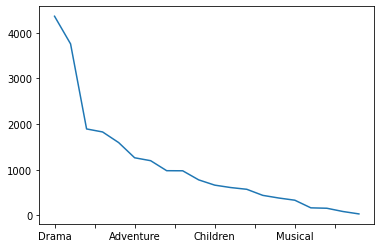

In [44]:
filmes_por_genero.plot()

Iniciamos usando o `plot` padrão do `Pandas`, e como percebemos, não adianta apenas gerar um gráfico, é preciso que ele faça sentido para a informação que queremos analisar. Neste caso, um gráfico de linhas não está fazendo muito sentido.

Temos um gráfico muito conhecido que sempre vemos por aí, o famoso gráfico de pizza.

Vamos gerar um gráfico deste para ver como fica.

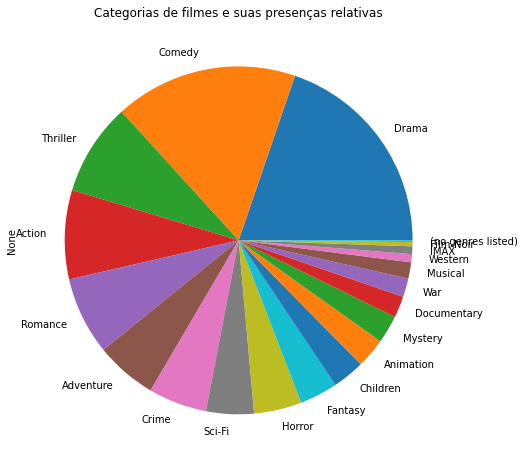

In [45]:
filmes_por_genero.plot(kind='pie', title='Categorias de filmes e suas presenças relativas', figsize=(8, 8))
plt.show()

E aí, o que achou? 

Conseguimos notar que Drama, Comedy, Thriller e Action tem proporções grandes, mas qualquer outra análise fica complicada. 

As cores se repetem, e fica difícil de mensurar os gêneros de filmes com as fatias melhores, além do gráfico sobrepor alguns textos dos labels.

Para facilitar nossa análise, vamos tentar outro tipo de gráfico, que deixa bem claro a diferença entre um gênero e outro. Faremos então um gráfico de barras.

Veja como é bem simples mudar o tipo de um gráfico.





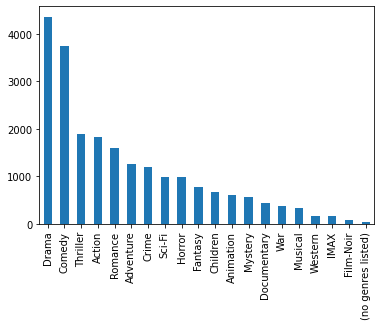

In [46]:
filmes_por_genero.plot(kind='bar')

Podemos ainda gerar este gráfico de diferentes formas, alterando cores e diversos elementos visuais.

Para isto usaremos outra biblioteca para geração de gráficos do Python, chamada `seaborn`.

Porém, antes vamos verificar duas outras funcionalidades da nossa estrutura de dados.

Temos como visualizar apenas os índices (gêneros) a partir do comando `index`.

In [47]:
filmes_por_genero.index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

E também podemos verificar só os valores, a partir do comando `values`.

Isto será importante na hora de montarmos nosso gráfico.

In [48]:
filmes_por_genero.values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

Agora, através da utilização da biblioteca `seaborn` vamos tentar melhorar ainda mais nossa apresentação dos dados.

Vamos tentar deixar mais evidente a diferença entre um gênero e outro utilizando uma espécie de *mapa de calor*, indicando quanto mais escura a cor, maior é a quantidade de filmes daquele gênero.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


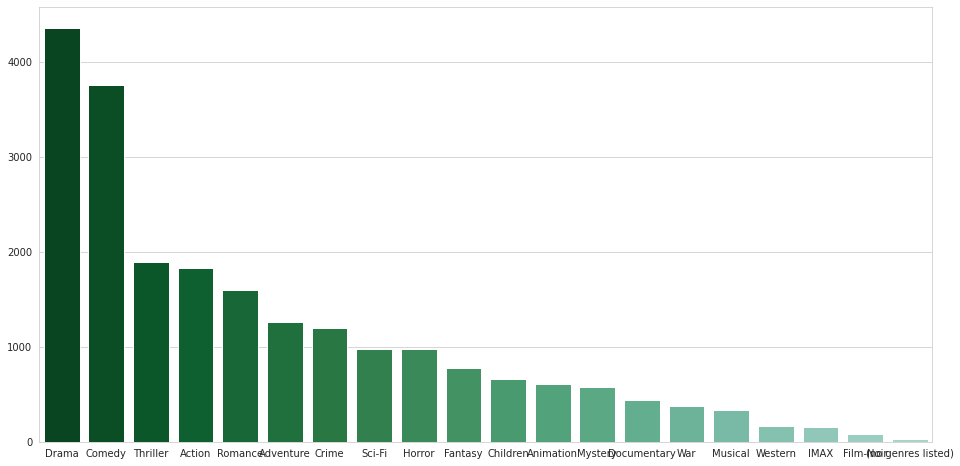

In [49]:
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(16,8))

sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 10))
plt.show()


Veja que utilizamos agora o `seaborn` para gerar o gráfico, e passamos um parâmetro indicando a paleta de cores que queremos utilizar (`color_palette`). Vocês podem pesquisar na internet sobre as paletas de cores do `seaborn` e descobrir diversas outras variações.

Com o que vimos até agora, conseguimos tirar diversas conclusões trabalhando com a visualização de gêneros. Será que podemos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.

Na primeira aula, calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [50]:
filmes_com_media

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


Como vimos, olhar apenas para as médias pode ser um problema e para interpretar um pouco melhor os dados, vamos utilizar o gráfico de histograma para comparar as notas de alguns filmes. Por exemplo, **Toy Story** e **Jumanji**.

3.9209302325581397


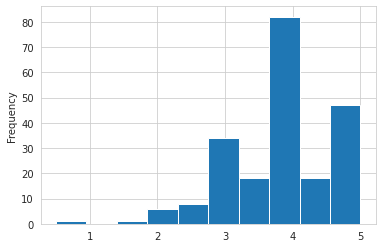

In [51]:
notas_do_filme1 = avaliacoes.query("filmeId == 1")["nota"]
print(notas_do_filme1.mean())
notas_do_filme1.plot(kind='hist')

3.4318181818181817


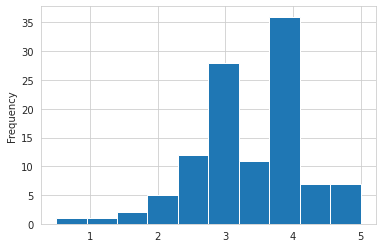

In [52]:
notas_do_filme2 = avaliacoes.query("filmeId == 2")["nota"]
print(notas_do_filme2.mean())
notas_do_filme2.plot(kind='hist')

Os dois filmes mostrados acima tem médias próximas, mas com comportamento de notas diferentes. 

Vamos discutir um pouco sobre o problema da média, com o exemplo abaixo. Olhando apenas para a média dos salários não conseguimos evidenciar a desigualdade de salários entre as pessoas das duas cidades.

In [53]:
# Cidade A

populacao = 1000
salario1000 = 1100

media = (salario1000 * 1000) / populacao
print(media)

# Cidade B

populacao = 1000
salario1 = 1000000
salario999 = 100

media = (salario1 * 1 + salario999 * 999) / populacao
print(media)

1100.0
1099.9


Vamos buscar filmes com médias muito mais próximas para analisar outras métricas além das médias.

In [54]:
filmes_com_media.sort_values("media", ascending=False)[2450:2500]

,filmeId,titulo,generos,media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


No exemplo acima, ordenamos e fatiamos os dados entre 2450 e 2500, onde encontramos médias similares. Vamos comparar dois filmes: Wizard of Oz, **filmeId=919** e Little Miss Sunshine, **filmeId=46578**.

Para não precisar ficar copiando e colando toda hora, vamos criar nossa primeira função, assim podemos passar o código do filme e temos as informações desejadas.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

Agora podemos fazer uso desta função:

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

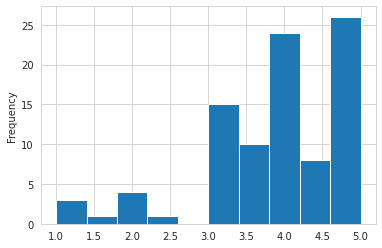

In [56]:
# Mágico de Oz 
plot_filme(919)

A função `plot_filme`, além de gerar o histograma também retorna algumas estatísticas. Vamos chamar a mesma função agora para o filme Little Miss Sunshine.

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

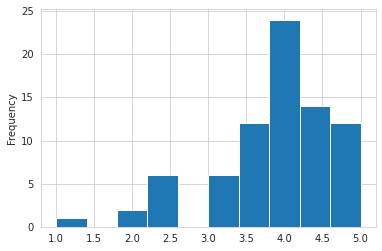

In [57]:
# Little Miss Sunshine
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas, vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que odeiam (notas 1). Quando comparamos com o histograma do filme **Little Miss Sunshine**, percebemos que os resultados se concentram entre valores medianos (notas 2 até 4).

O que confirma nossa análise aqui é comparar os **25%, 50% e 75%**. 50% representa o valor da mediana, e ambos dos filmes tem a mesma mediana, mas 25% e 75% diferentes. Se quiser mais detalhes sobre a estatística destes itens, consulte: [**1º, 2º e 3º quartis**](https://pt.wikipedia.org/wiki/Quartil)

A ideia de mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados de forma ainda melhor. O gráfico que nos ajuda neste caso é o `boxplot`. Vamos adaptar nossa função anterior para adicionar a geração deste gráfico.

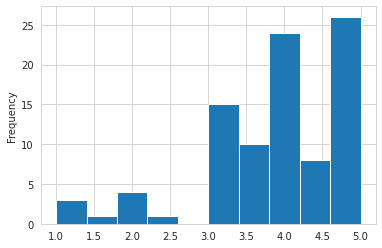

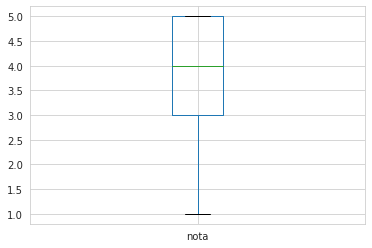

44       5.0
356      5.0
1840     4.0
3004     5.0
5099     5.0
        ... 
96296    5.0
97174    2.0
98526    5.0
98833    2.5
99591    3.5
Name: nota, Length: 92, dtype: float64


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [58]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print("\n")
  notas_do_filme.plot.box()
  plt.show()
  print(notas_do_filme)
  return notas_do_filme.describe()


plot_filme(919)

Você pode notar como é simples criar um `boxplot` com a biblioteca `pandas`.

Apenas chamamos o método `.plot.box()`. Vamos tentar interpretar este gráfico.

Vamos focar primeiro na caixinha que aparece neste gráfico. A linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo `describe`), a parte superior da caixa é o 3º quartil (75%) e a parte inferir é o 1º quartil (25%).

Agora repare nos limites inferior e superior, representados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superior e inferior são calculados e dependem do 1º e 3º quartil. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior, vamos calcular o `boxplot` para outro filme.

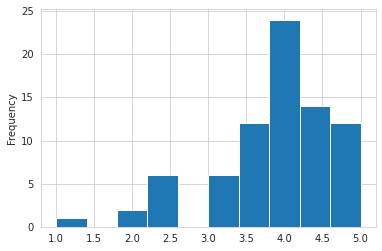

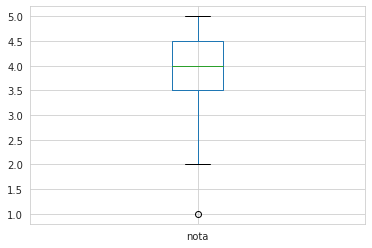

2081      3.5
4628      2.0
5788      4.0
7273      3.0
9944      4.5
         ... 
94573     2.5
95835     4.5
95916     3.5
98409     4.0
100202    5.0
Name: nota, Length: 77, dtype: float64


count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [59]:
plot_filme(46578)

Neste caso, os limites superiores não se sobrepõem e temos uma informação a mais. Aparece uma pequena bolinha localizada em `y=1`. A bolinha é chamada de valor discrepante ou *outlier*, por ficar muito fora dos limites inferior e superior.

Ao olhar o histograma e o boxplot dos dois filmes, podemos notar melhor a diferença entre as avaliações entre eles.

Embora melhoramos nossa qualidade de análise, ainda temos mais um ponto. Estamos comparando os boxplots dos filmes, mas eles estão em imagens separadas. Vamos juntar vários boxplots em uma única imagem. Veja como podemos fazer isso usando o `seaborn`, para aprendermos outra forma de plotar um boxplot.

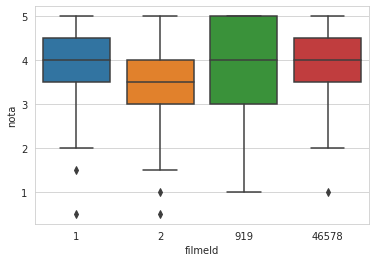

In [60]:
sns.boxplot(data = avaliacoes.query("filmeId in [1, 2, 919, 46578]"), x="filmeId", y="nota")

Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro `data` é um `dataframe` das notas dos filmes **Toy Story, Jumanji, Wizard of Oz e Little Miss Sunshine** (usamos o `.query()` para selecionar os dados). **x** indica o ID dos filmes e **y** as respectivas notas. Agora é possível comparar as notas dos filmes de forma muito mais clara.

Com isto, finalizamos nossa segunda aula de Ciência de Dados, e ficam alguns desafios para vocês resolverem.

# Desafios

**Desafio 1:** Rotacionar os thick para 45 graus (os nomes dos gêneros) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

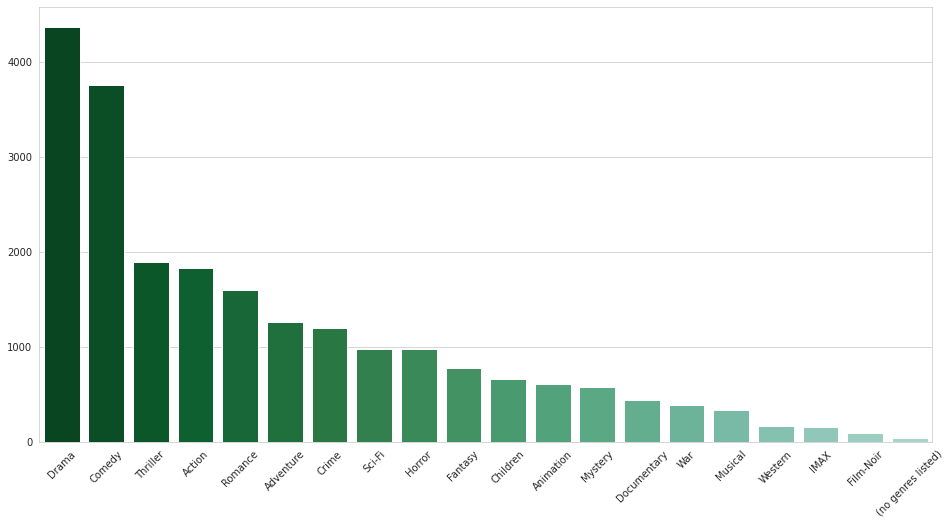

In [80]:
sns.set_style("whitegrid")

plt.figure(figsize=(16,8))

sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 10))
plt.xticks(rotation=45)
plt.show()


**Desafio 2:** Encontrar vários filmes com médias próximas e distribuições diferentes. Use a função 
**plot_filmes** para plotar.

In [84]:
filmes_com_media.sort_values("media", ascending=False)[2450:2500]

,filmeId,titulo,generos,media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


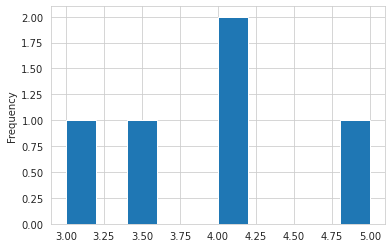

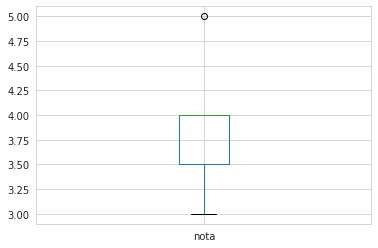

4329     3.5
26391    4.0
35916    5.0
55613    3.0
62910    4.0
Name: nota, dtype: float64


count    5.00000
mean     3.90000
std      0.74162
min      3.00000
25%      3.50000
50%      4.00000
75%      4.00000
max      5.00000
Name: nota, dtype: float64

In [85]:
plot_filme(1785)

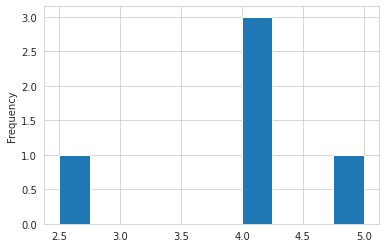

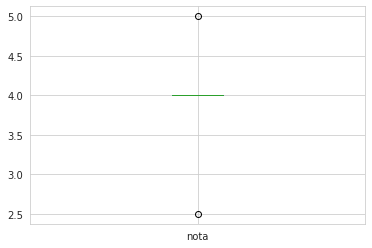

14115    4.0
46956    4.0
56331    5.0
73503    4.0
93097    2.5
Name: nota, dtype: float64


count    5.000000
mean     3.900000
std      0.894427
min      2.500000
25%      4.000000
50%      4.000000
75%      4.000000
max      5.000000
Name: nota, dtype: float64

In [87]:
plot_filme(1366)

**Desafio 3:** Criar o boxplot dos 10 filmes com mais votos (não é com a maior média, é com mais votos).

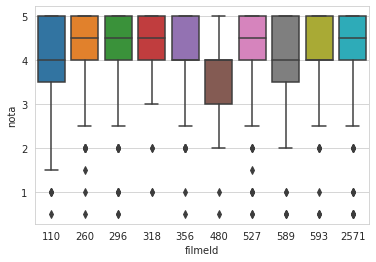

In [93]:

top_10 = list(filmes_com_votos.sort_values("votos", ascending=False).head(10).filmeId)

sns.boxplot(data=avaliacoes.query(f"filmeId in {top_10}"), x = "filmeId", y = "nota")

**Desafio 4:** Configurar a visualização do boxplot gerado pelo seaborn (último boxplot na aula), de modo a mostrar o nome do filme ao invés do ID.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

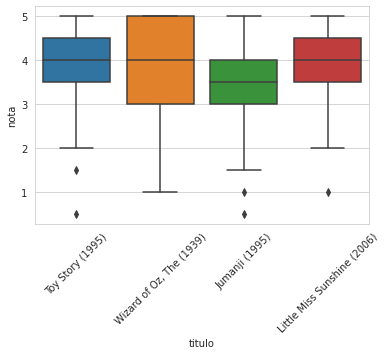

In [96]:
avaliacoes_com_titulo = avaliacoes.query("filmeId in [1, 2, 919, 46578]").merge(filmes, on = "filmeId")
sns.boxplot(data = avaliacoes_com_titulo.query("filmeId in [1, 2, 919, 46578]"), x="titulo", y="nota")
plt.xticks(rotation=45)